In [64]:
from func_def import *
df = pd.read_csv('data_processed.csv',index_col=[0]).reset_index(drop=True)
df.head(3)

,event_url,date,result,fighter,opponent,title,method,round,time,format,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att,f_win_perc,o_win_perc,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak
0,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),0.33,0.34,0.33,0.33,0.34,0.33,1.00,0.00,0.00,0.14,0.00,0.85,0,6,0,0,0,0,0,6,0,0,0,0,7,10,0,0,0,1,1,4,0,0,6,7,0.333333,0.272727,0,1,1,0
1,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),0.57,0.34,0.07,0.92,0.07,0.00,0.36,0.18,0.45,1.00,0.00,0.00,15,47,9,12,2,3,24,60,2,2,0,0,4,15,2,3,5,10,11,27,0,1,0,0,1.000000,0.181818,2,1,0,0
2,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),0.72,0.25,0.02,0.92,0.07,0.00,0.60,0.35,0.04,0.80,0.02,0.16,29,122,10,17,1,2,37,133,3,8,0,0,41,134,24,36,3,6,55,141,2,9,11,26,0.333333,0.400000,1,0,0,3


In [65]:
# Creating mean statistics

df['f_str_att'] = df['f_head_str_att'] + df['f_body_str_att'] + df['f_leg_str_att']
df['o_str_att'] = df['o_head_str_att'] + df['o_body_str_att'] + df['o_leg_str_att']
df['f_str_succ'] = df['f_head_str_succ'] + df['f_body_str_succ'] + df['f_leg_str_succ']
df['o_str_succ'] = df['o_head_str_succ'] + df['o_body_str_succ'] + df['o_leg_str_succ']

STAT_COLUMNS = list(set(['str_att','str_succ'] + [col[2:] for col in df.columns if 'perc' in col] + [col[2:] for col in df.columns if 'succ' in col] + [col[2:] for col in df.columns if 'att' in col]))

for column in tqdm(STAT_COLUMNS):
    #print(f'{column}')
    df[f'f_{column}_mean'] = [get_mean_stat(fighter=df.loc[i,'fighter'],stat_col=f'f_{column}',time=df.loc[i,'date'],data=df) for i in range(len(df))]
    df[f'o_{column}_mean'] = [get_mean_stat(fighter=df.loc[i,'opponent'],stat_col=f'o_{column}',time=df.loc[i,'date'],data=df) for i in range(len(df))]

df.head(3)

100%|██████████| 21/21 [13:07<00:00, 37.52s/it]


,event_url,date,result,fighter,opponent,title,method,round,time,format,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att,f_win_perc,o_win_perc,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak,f_str_att,o_str_att,f_str_succ,o_str_succ,f_str_succ_mean,o_str_succ_mean,f_head_str_succ_mean,o_head_str_succ_mean,f_body_str_succ_mean,o_body_str_succ_mean,f_clinch_str_att_mean,o_clinch_str_att_mean,f_ground_str_perc_mean,o_ground_str_perc_mean,f_win_perc_mean,o_win_perc_mean,f_head_str_att_mean,o_head_str_att_mean,f_clinch_str_succ_mean,o_clinch_str_succ_mean,f_dist_str_perc_mean,o_dist_str_perc_mean,f_head_str_perc_mean,o_head_str_perc_mean,f_distance_str_succ_mean,o_distance_str_succ_mean,f_ground_str_succ_mean,o_ground_str_succ_mean,f_body_str_att_mean,o_body_str_att_mean,f_distance_str_att_mean,o_distance_str_att_mean,f_leg_str_att_mean,o_leg_str_att_mean,f_str_att_mean,o_str_att_mean,f_clinch_str_perc_mean,o_clinch_str_perc_mean,f_ground_str_att_mean,o_ground_str_att_mean,f_body_str_perc_mean,o_body_str_perc_mean,f_leg_str_succ_mean,o_leg_str_succ_mean,f_leg_str_perc_mean,o_leg_str_perc_mean
0,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),0.33,0.34,0.33,0.33,0.34,0.33,1.00,0.00,0.00,0.14,0.00,0.85,0,6,0,0,0,0,0,6,0,0,0,0,7,10,0,0,0,1,1,4,0,0,6,7,0.333333,0.272727,0,1,1,0,6,11,0,7,37.666667,74.818182,23.444444,43.818182,7.888889,18.590909,5.444444,8.681818,0.366667,0.108636,0.275265,0.179668,53.555556,102.227273,4.222222,7.5,0.513333,0.780909,0.624444,0.553636,22.444444,60.818182,11.000000,6.500000,11.777778,25.181818,52.111111,125.090909,7.222222,15.090909,72.555556,142.500000,0.107778,0.100909,15.000000,8.727273,0.216667,0.265909,6.333333,12.409091,0.147778,0.170
1,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),0.57,0.34,0.07,0.92,0.07,0.00,0.36,0.18,0.45,1.00,0.00,0.00,15,47,9,12,2,3,24,60,2,2,0,0,4,15,2,3,5,10,11,27,0,1,0,0,1.000000,0.181818,2,1,0,0,62,28,26,11,14.000000,24.000000,9.000000,18.818182,4.500000,2.727273,0.000000,5.818182,0.320000,0.068182,0.500000,0.266270,29.000000,41.727273,0.000000,4.0,0.670000,0.766364,0.635000,0.737273,9.500000,17.818182,4.500000,2.181818,5.000000,3.545455,27.500000,39.909091,0.500000,3.909091,34.500000,49.181818,0.000000,0.155455,7.000000,3.454545,0.320000,0.101818,0.500000,2.454545,0.035000,0.150
2,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),0.72,0.25,0.02,0.92,0.07,0.00,0.60,0.35,0.04,0.80,0.02,0.16,29,122,10,17,1,2,37,133,3,8,0,0,41,134,24,36,3,6,55,141,2,9,11,26,0.333333,0.400000,1,0,0,3,141,176,40,68,59.333333,35.600000,47.666667,18.300000,7.666667,12.200000,7.833333,3.900000,0.074444,0.038000,0.240024,0.428254,123.666667,83.200000,4.833333,2.6,0.863889,0.890000,0.782222,0.522000,51.555556,31.400000,2.944444,1.600000,11.388889,20.900000,127.000000,104.300000,4.944444,6.100000,140.000000,110.200000,0.052778,0.061000,5.166667,2.000000,0.116667,0.339000,4.000000,5.100000,0.090000,0.127


In [66]:
# Constructing dif columns(=final features)
for feature in tqdm(STAT_COLUMNS):
    df[f'{feature}_mean_dif'] = df[f'f_{feature}_mean'] - df[f'o_{feature}_mean']

ENRICHMENT_COLUMNS = [col for col in df.columns if 'streak' in col]
ENRICHMENT_COLUMNS = list(set([col[2:] if ('f_' in col) or ('o_' in col) else col for col in ENRICHMENT_COLUMNS]))

for column in tqdm(ENRICHMENT_COLUMNS):
    df[f'{column}_dif'] = df[f'f_{column}'] - df[f'o_{column}']

data = df[['event_url','date','result','fighter','opponent','title','method','round','time','format']+[col for col in df.columns if '_dif' in col]]
data.head(3)    

100%|██████████| 2/2 [00:00<00:00, 1418.43it/s]


,event_url,date,result,fighter,opponent,title,method,round,time,format,str_succ_mean_dif,head_str_succ_mean_dif,body_str_succ_mean_dif,clinch_str_att_mean_dif,ground_str_perc_mean_dif,win_perc_mean_dif,head_str_att_mean_dif,clinch_str_succ_mean_dif,dist_str_perc_mean_dif,head_str_perc_mean_dif,distance_str_succ_mean_dif,ground_str_succ_mean_dif,body_str_att_mean_dif,distance_str_att_mean_dif,leg_str_att_mean_dif,str_att_mean_dif,clinch_str_perc_mean_dif,ground_str_att_mean_dif,body_str_perc_mean_dif,leg_str_succ_mean_dif,leg_str_perc_mean_dif,current_lose_streak_dif,current_win_streak_dif
0,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),-37.151515,-20.373737,-10.702020,-3.237374,0.258030,0.095596,-48.671717,-3.277778,-0.267576,0.070808,-38.373737,4.500000,-13.404040,-72.979798,-7.868687,-69.944444,0.006869,6.272727,-0.049242,-6.075758,-0.022222,1,-1
1,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),-10.000000,-9.818182,1.772727,-5.818182,0.251818,0.233730,-12.727273,-4.000000,-0.096364,-0.102273,-8.318182,2.318182,1.454545,-12.409091,-3.409091,-14.681818,-0.155455,3.545455,0.218182,-1.954545,-0.115000,0,1
2,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),23.733333,29.366667,-4.533333,3.933333,0.036444,-0.188230,40.466667,2.233333,-0.026111,0.260222,20.155556,1.344444,-9.511111,22.700000,-1.155556,29.800000,-0.008222,3.166667,-0.222333,-1.100000,-0.037000,-3,1


In [67]:
# Normalize features:
FEATURES = list(data.columns[list(data.columns).index('format')+1:])

for feature in tqdm(FEATURES):
    mean = data[feature].mean()
    std = data[feature].std()
    df[feature] = (df[feature] - mean)/std

df.describe()

100%|██████████| 23/23 [00:00<00:00, 1828.83it/s]


,round,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att,f_win_perc,o_win_perc,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak,f_str_att,o_str_att,f_str_succ,o_str_succ,f_str_succ_mean,o_str_succ_mean,f_head_str_succ_mean,o_head_str_succ_mean,f_body_str_succ_mean,o_body_str_succ_mean,f_clinch_str_att_mean,o_clinch_str_att_mean,f_ground_str_perc_mean,o_ground_str_perc_mean,f_win_perc_mean,o_win_perc_mean,f_head_str_att_mean,o_head_str_att_mean,f_clinch_str_succ_mean,o_clinch_str_succ_mean,f_dist_str_perc_mean,o_dist_str_perc_mean,f_head_str_perc_mean,o_head_str_perc_mean,f_distance_str_succ_mean,o_distance_str_succ_mean,f_ground_str_succ_mean,o_ground_str_succ_mean,f_body_str_att_mean,o_body_str_att_mean,f_distance_str_att_mean,o_distance_str_att_mean,f_leg_str_att_mean,o_leg_str_att_mean,f_str_att_mean,o_str_att_mean,f_clinch_str_perc_mean,o_clinch_str_perc_mean,f_ground_str_att_mean,o_ground_str_att_mean,f_body_str_perc_mean,o_body_str_perc_mean,f_leg_str_succ_mean,o_leg_str_succ_mean,f_leg_str_perc_mean,o_leg_str_perc_mean,str_succ_mean_dif,head_str_succ_mean_dif,body_str_succ_mean_dif,clinch_str_att_mean_dif,ground_str_perc_mean_dif,win_perc_mean_dif,head_str_att_mean_dif,clinch_str_succ_mean_dif,dist_str_perc_mean_dif,head_str_perc_mean_dif,distance_str_succ_mean_dif,ground_str_succ_mean_dif,body_str_att_mean_dif,distance_str_att_mean_dif,leg_str_att_mean_dif,str_att_mean_dif,clinch_str_perc_mean_dif,ground_str_att_mean_dif,body_str_perc_mean_dif,leg_str_succ_mean_dif,leg_str_perc_mean_dif,current_lose_streak_dif,current_win_streak_dif
count,7262.000000,7262.00000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03
mean,2.353346,0.59978,0.201097,0.175103,0.662167,0.148631,0.166790,0.606666,0.197326,0.171321,0.660633,0.148035,0.168214,22.526852,63.122556,7.473836,10.777609,5.937758,7.383641,25.914211,66.730790,5.095015,7.341091,4.929221,7.211925,23.015147,63.989121,7.434591,10.775406,5.883365,7.307078,26.192922,67.376480,5.103553,7.354586,5.036629,7.340540,0.250836,0.248004,0.315891,0.300193,1.321261,1.322914,81.283806,82.071606,35.938447,36.333104,29.301756,29.554489,18.836202,19.00

<AxesSubplot:xlabel='result', ylabel='str_succ_mean_dif'>

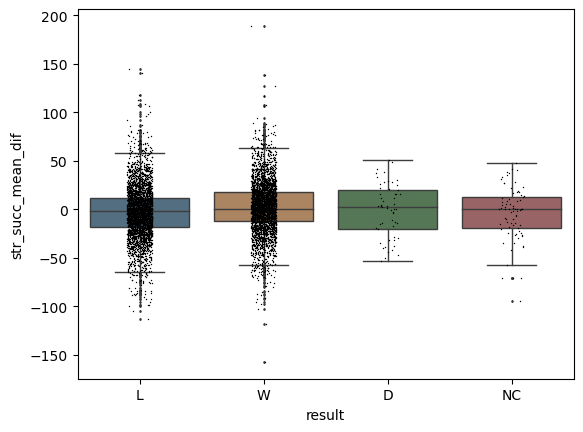

In [71]:
# Visualize features effect:
SELECTED_FEATURE = 'str_succ_mean_dif'
sns.boxplot(x='result',y=SELECTED_FEATURE,data=data,saturation=0.3,linewidth=1,fliersize=1)
sns.stripplot(x='result',y=SELECTED_FEATURE,data=data,size=1,jitter=True,color='black')

<AxesSubplot:xlabel='str_succ_mean_dif', ylabel='Count'>

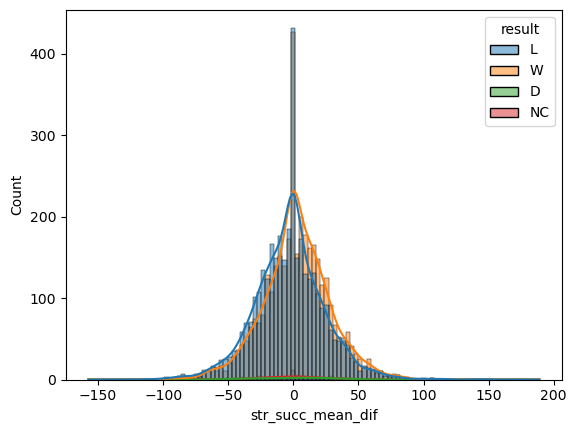

In [72]:
# Visualize features effect:
sns.histplot(x='str_succ_mean_dif',data=data,hue='result',kde=True)
#sns.histplot(x='head_str_perc_mean_dif',data=data,legend='result')

In [73]:
data.to_csv('data_features_ready.csv',index=None)
print('data_features_ready.csv saved.')
pd.read_csv('data_features_ready.csv').head(3)

data_features_ready.csv saved.


,event_url,date,result,fighter,opponent,title,method,round,time,format,str_succ_mean_dif,head_str_succ_mean_dif,body_str_succ_mean_dif,clinch_str_att_mean_dif,ground_str_perc_mean_dif,win_perc_mean_dif,head_str_att_mean_dif,clinch_str_succ_mean_dif,dist_str_perc_mean_dif,head_str_perc_mean_dif,distance_str_succ_mean_dif,ground_str_succ_mean_dif,body_str_att_mean_dif,distance_str_att_mean_dif,leg_str_att_mean_dif,str_att_mean_dif,clinch_str_perc_mean_dif,ground_str_att_mean_dif,body_str_perc_mean_dif,leg_str_succ_mean_dif,leg_str_perc_mean_dif,current_lose_streak_dif,current_win_streak_dif
0,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),-37.151515,-20.373737,-10.702020,-3.237374,0.258030,0.095596,-48.671717,-3.277778,-0.267576,0.070808,-38.373737,4.500000,-13.404040,-72.979798,-7.868687,-69.944444,0.006869,6.272727,-0.049242,-6.075758,-0.022222,1,-1
1,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),-10.000000,-9.818182,1.772727,-5.818182,0.251818,0.233730,-12.727273,-4.000000,-0.096364,-0.102273,-8.318182,2.318182,1.454545,-12.409091,-3.409091,-14.681818,-0.155455,3.545455,0.218182,-1.954545,-0.115000,0,1
2,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),23.733333,29.366667,-4.533333,3.933333,0.036444,-0.188230,40.466667,2.233333,-0.026111,0.260222,20.155556,1.344444,-9.511111,22.700000,-1.155556,29.800000,-0.008222,3.166667,-0.222333,-1.100000,-0.037000,-3,1
